## Gerando a Matriz de Confusão

Utilizei o TensorFlow para treinar uma rede simples de classificação para que possa gerar a matriz de confusão.

In [1]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
# Utilizando os dados do MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Criando um modelo simples
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'recall'])

model.fit(x_train, y_train, epochs=10) # Treinando o modelo

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.8766 - loss: 0.4318 - recall: 0.8041
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9653 - loss: 0.1181 - recall: 0.9595
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9770 - loss: 0.0773 - recall: 0.9734
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9829 - loss: 0.0547 - recall: 0.9808
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9872 - loss: 0.0432 - recall: 0.9855
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9898 - loss: 0.0344 - recall: 0.9887
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9917 - loss: 0.0274 - recall: 0.9908
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9939 - loss: 0.0196 - recall: 0.9934
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9954 - loss: 0.0158 - recall: 0.9949
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


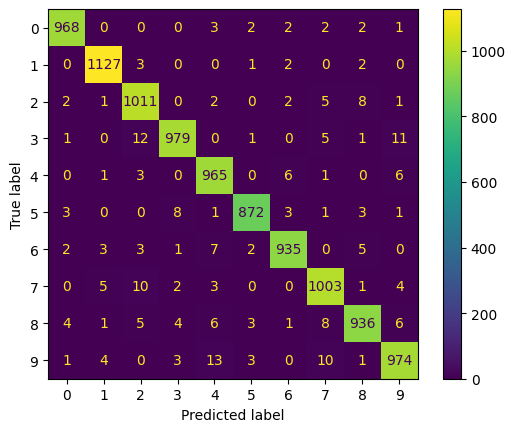

In [3]:
y_pred = model.predict(x_test) # Obtendo as respostas para os dados de teste

# Convertendo as previsões e os rótulos verdadeiros de volta para classes
y_pred_classes = tf.argmax(y_pred, axis=1)
y_true_classes = tf.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes) # Obtendo a matriz de confusão

# Visualização da matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Obtendo as métricas

In [4]:
import numpy as np

def get_metrics_by_cm(cm):
  '''
    Função que recebe uma matriz de confusão e retorna as métricas de acurácia, precisão, recall, especificidade e F1 Score.
    A função calcula as métricas baseados nas seguintes equações:
      - Acurácia: (TP + TN) / (TP + TN + FP + FN)
      - Precisão: TP / (TP + FP)
      - Recall: TP / (TP + FN)
      - Especificidade: TN / (TN + FP)
      - F1 Score: (2 * Precision * Recall) / (Precision + Recall)

    Parâmetros:
      - cm: Matriz de confusão

    Retorno:
      - accuracy: Acurácia
      - precision: Precisão
      - recall: Recall
      - specificity: Especificidade
      - f1_score: F1 Score
  '''
  total_tp = total_fp = total_fn = total_tn = np.array([])

  # Percorre a matriz calculando os parâmetros para cada classe e os adiciona aos vetores auxiliares
  for i in range(len(cm)):
      tp = cm[i][i]  # Verdadeiros positivos
      fp = sum(cm[i]) - tp  # Falsos positivos
      fn = sum(cm[:, i]) - tp  # Falsos negativos
      tn = cm.sum() - (tp + fp + fn)  # Verdadeiros negativos

      total_tp = np.append(total_tp, tp)
      total_fp = np.append(total_fp, fp)
      total_fn = np.append(total_fn, fn)
      total_tn = np.append(total_tn, tn)

  # Cálculo das métricas baseado na média entre as classes
  total_tp = np.mean(total_tp)
  total_fp = np.mean(total_fp)
  total_fn = np.mean(total_fn)
  total_tn = np.mean(total_tn)
  total = total_tp + total_fp + total_fn + total_tn

  accuracy = (total_tp + total_tn) / total if total > 0 else 0
  precision = total_tp / (total_tp + total_fp) if (total_tp + total_fp) > 0 else 0
  recall = total_tp / (total_tp + total_fn) if (total_tp + total_fn) > 0 else 0
  specificity = total_tn / (total_tn + total_fp) if (total_tn + total_fp) > 0 else 0
  f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

  return accuracy, precision, recall, specificity, f1_score


In [5]:
acc, prec, rec, spec, f1 = get_metrics_by_cm(cm)
print("Acurácia: ", acc)
print("Precisão: ", prec)
print("Recall: ", rec)
print("Especificidade: ", spec)
print("F1 Score: ", f1)

Acurácia:  0.9954
Precisão:  0.977
Recall:  0.977
Especificidade:  0.9974444444444445
F1 Score:  0.977


Comparação entre as métricas medidas utilizando a função get_metrics_by_cm() com os valores obtidos utilizando os métodos da biblioteca scikit-learn:

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.metrics import specificity_score

acc_sk = accuracy_score(y_true_classes, y_pred_classes)
prec_sk = precision_score(y_true_classes, y_pred_classes, average='macro')
rec_sk = recall_score(y_true_classes, y_pred_classes, average='macro')
spec_sk = specificity_score(y_true_classes, y_pred_classes, average='macro')
f1_sk = f1_score(y_true_classes, y_pred_classes, average='macro')

line = "-" * 60
print("Acurácia:\n Manual: ", acc, "\t Sklearn: ", acc_sk, "\n", line)
print("Precisão:\n Manual: ", prec, "\t Sklearn: ", prec_sk, "\n", line)
print("Recall:\n Manual: ", rec, "\t Sklearn: ", rec_sk, "\n", line)
print("Especificidade:\n Manual: ", spec, "\t Imblearn: ", spec_sk, "\n", line)
print("F1 Score:\n Manual: ", f1, "\t Sklearn: ", f1_sk, "\n", line)

Acurácia:
 Manual:  0.9954 	 Sklearn:  0.977 
 ------------------------------------------------------------
Precisão:
 Manual:  0.977 	 Sklearn:  0.9770994523880792 
 ------------------------------------------------------------
Recall:
 Manual:  0.977 	 Sklearn:  0.9767902003442055 
 ------------------------------------------------------------
Especificidade:
 Manual:  0.9974444444444445 	 Imblearn:  0.9974430527648025 
 ------------------------------------------------------------
F1 Score:
 Manual:  0.977 	 Sklearn:  0.9769158183519904 
 ------------------------------------------------------------
